#**Segmentation on EV Market**
- Vehicle Type

###1. **Import Libraries**

In [61]:
# import libraries
import pandas as pd   #reads and manages csv data
import numpy as np    #numerical calculations
import matplotlib.pyplot as plt  #graphs and visualization
import seaborn as sns


###2. **Load Datasets**

files used:
- india_vehicle_sales_yearly.xlsx - Sheet1.csv
- ev_sales_by_makers_and_cat_15-24.csv

In [62]:
# load the datasets
# Dataset 1: EV sales by vehicle type
df_sales = pd.read_csv("/content/drive/MyDrive/india_vehicle_sales_yearly.xlsx - Sheet1.csv")

# Dataset 2: EV category trend data
df_trend = pd.read_csv("/content/drive/MyDrive/ev_sales_by_makers_and_cat_15-24.csv")


**Key Takeaways:**
- Loads both CSV files into Python
- Stores them as dataframes
- combining current market structure with historical trends.

###3. **Initial Data Understanding**

In [63]:
# understand the data
df_sales.head()


,State,Year,Two Wheelers,Three Wheelers,Cars,Buses,Trucks
0,Andhra Pradesh,2010,171958,20795,151932,4272,6734
1,Andhra Pradesh,2011,187337,21850,107498,3944,9322
2,Andhra Pradesh,2012,379365,5769,214027,2933,6311
3,Andhra Pradesh,2013,153355,44188,234176,3885,7396
4,Andhra Pradesh,2014,308795,32480,176730,3058,8849


**Key Takeaways:**
- ensures the data is reliable before segmentation.
- tels whether data is numeric, which columns are present, and missing values if any.

In [64]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           592 non-null    object
 1   Year            592 non-null    int64 
 2   Two Wheelers    592 non-null    int64 
 3   Three Wheelers  592 non-null    int64 
 4   Cars            592 non-null    int64 
 5   Buses           592 non-null    int64 
 6   Trucks          592 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 32.5+ KB


In [65]:
df_trend.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


In [66]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     1386 non-null   object
 1   Maker   1386 non-null   object
 2   2015    1386 non-null   int64 
 3   2016    1386 non-null   int64 
 4   2017    1386 non-null   int64 
 5   2018    1386 non-null   int64 
 6   2019    1386 non-null   int64 
 7   2020    1386 non-null   int64 
 8   2021    1386 non-null   int64 
 9   2022    1386 non-null   int64 
 10  2023    1386 non-null   int64 
 11  2024    1386 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 130.1+ KB


###4. **Data Transformation**

In [67]:
# data transformation
df_long = df_sales.melt(
    id_vars=["State", "Year"],
    var_name="Vehicle_Type",
    value_name="EV_Sales"
)


**Key Takeaways:**
- Converts many vehicle columns into one column
- Makes grouping & plotting easier

###5. **Data Cleaning**

In [68]:
# basic cleaning
df_long.dropna(inplace=True)
df_long["EV_Sales"] = df_long["EV_Sales"].astype(int)
df_long.head()




,State,Year,Vehicle_Type,EV_Sales
0,Andhra Pradesh,2010,Two Wheelers,171958
1,Andhra Pradesh,2011,Two Wheelers,187337
2,Andhra Pradesh,2012,Two Wheelers,379365
3,Andhra Pradesh,2013,Two Wheelers,153355
4,Andhra Pradesh,2014,Two Wheelers,308795


**Key Takeaways:**
- Removes empty values
- Ensures sales numbers are numeric

In [69]:
df_trend_clean = df_trend.drop(columns=["Maker"])
df_trend_clean.head()

,Cat,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,0,0,31,12,0,0,0,0,0,0
1,3W,0,0,0,0,0,0,112,390,545,51
2,2W,0,0,0,1,0,0,0,0,0,0
3,3W,0,1,1,0,0,0,0,0,0,0
4,3W,0,0,0,0,48,66,43,68,266,578


In [70]:
df_trend_long = df_trend_clean.melt(
    id_vars=["Cat"],
    var_name="Year",
    value_name="Sales"
)

df_trend_long.rename(columns={"Cat": "Vehicle_Type"}, inplace=True)

df_trend_long["Year"] = df_trend_long["Year"].astype(int)
df_trend_long["Sales"] = df_trend_long["Sales"].astype(int)

df_trend_long.head()


,Vehicle_Type,Year,Sales
0,3W,2015,0
1,3W,2015,0
2,2W,2015,0
3,3W,2015,0
4,3W,2015,0


**Key Takeaways:**

###6. **Market Segmentation**

In [71]:
# core segmentation
vehicle_segment = (
    df_long.groupby("Vehicle_Type")["EV_Sales"]
    .sum()
    .reset_index()
    .sort_values(by="EV_Sales", ascending=False)
)
vehicle_segment



,Vehicle_Type,EV_Sales
4,Two Wheelers,161613476
1,Cars,92177699
2,Three Wheelers,16070780
3,Trucks,3316150
0,Buses,1618343


**Key Takeaways:**
- Total EV sales for each vehicle type across India.

###7. **Define Market Segments**


In [72]:
# segment classification
total_market = vehicle_segment["EV_Sales"].sum()

def market_segment(sales):
    if sales >= 0.4 * total_market:
        return "Mass Market Segment"
    elif sales >= 0.15 * total_market:
        return "Growth Segment"
    else:
        return "Niche Segment"

vehicle_segment["Segment_Type"] = vehicle_segment["EV_Sales"].apply(market_segment)
vehicle_segment


,Vehicle_Type,EV_Sales,Segment_Type
4,Two Wheelers,161613476,Mass Market Segment
1,Cars,92177699,Growth Segment
2,Three Wheelers,16070780,Niche Segment
3,Trucks,3316150,Niche Segment
0,Buses,1618343,Niche Segment


**Key Takeaways:**
- Automatically classifies vehicle types into:
  - Mass Market = dominates demand
  - Growth Segment = rising opportunity
  - Niche Segment = limited but strategic

###8. **EV MARKET SHARE BY VEHICLE TYPE**

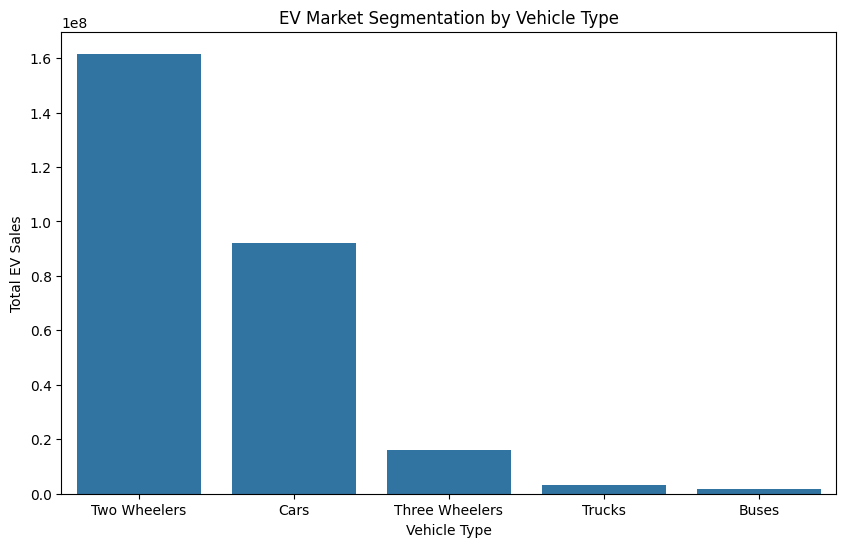

In [73]:
# market share by vehicle type
plt.figure(figsize=(10,6))
sns.barplot(
    data=vehicle_segment,
    x="Vehicle_Type",
    y="EV_Sales"
)
plt.title("EV Market Segmentation by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Total EV Sales")
plt.show()



**Key Takeaways:**
This graph shows:
- Which vehicle type dominates the EV market
- Companies often assume 4W EVs are dominant — this graph disproves it
- Two-wheelers usually dominate → mass adoption = affordable

###9. **GEOGRAPHIC SEGMENTATION**

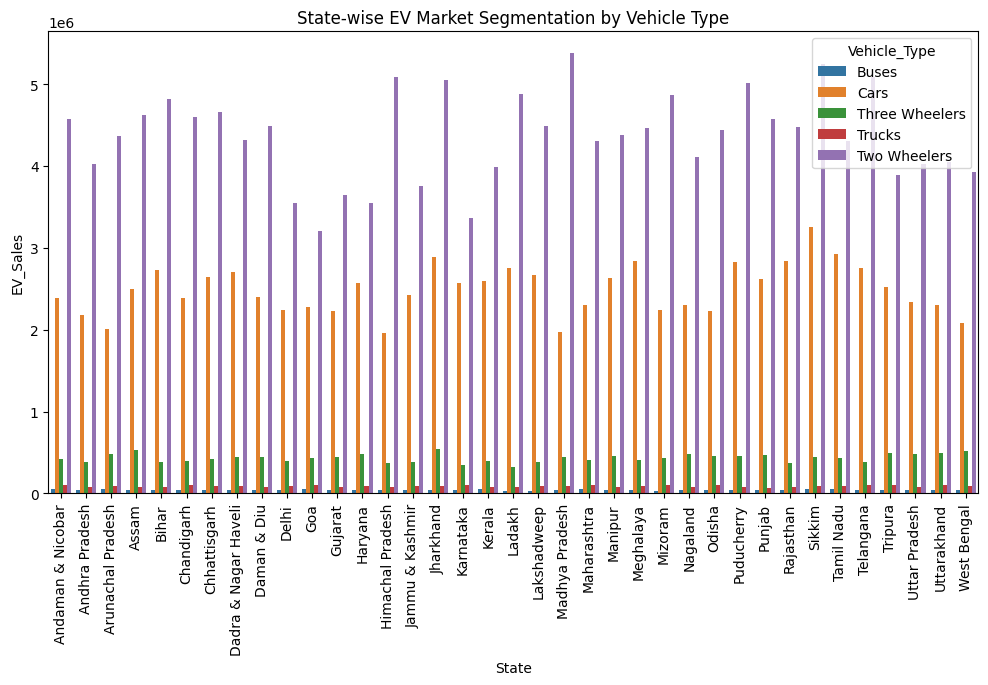

In [74]:
# geographic segmentation
state_vehicle = (
    df_long.groupby(["State", "Vehicle_Type"])["EV_Sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=state_vehicle,
    x="State",
    y="EV_Sales",
    hue="Vehicle_Type"
)
plt.xticks(rotation=90)
plt.title("State-wise EV Market Segmentation by Vehicle Type")
plt.show()




**Key Takeaways:**
This graph shows:
- Which states prefer which vehicle types
- Uniform national strategy fails
- EV strategy must be state-specific


###10. **LONG-TERM GROWTH TREND**

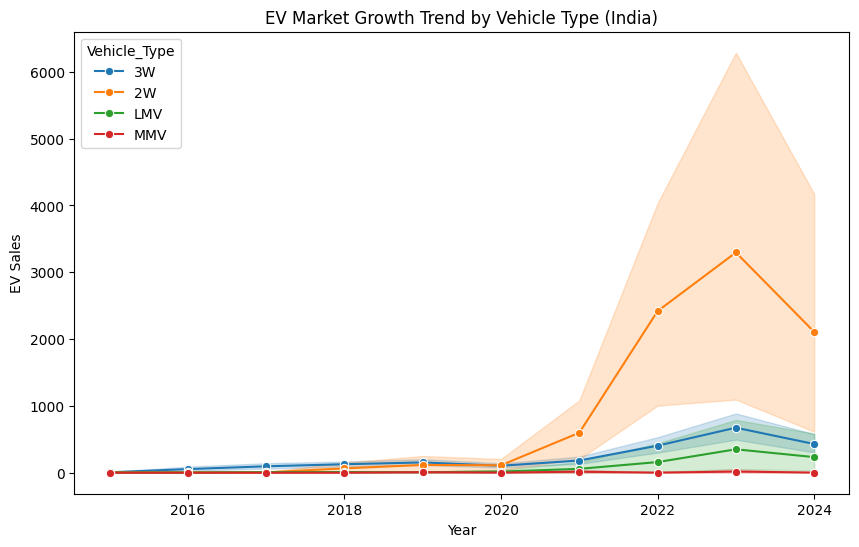

In [75]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_trend_long,
    x="Year",
    y="Sales",
    hue="Vehicle_Type",
    marker="o"
)
plt.title("EV Market Growth Trend by Vehicle Type (India)")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.show()


**Key Takeaways:**
This graph depicts:
- How each EV vehicle type has evolved from 2015 to 2024
- Which segments are:
   - Rapidly growing
   - Saturating
   - Emerging late

## **Problem:**
- Some vehicle types grow slowly but steadily
- Others show sharp acceleration after 2020

##**ML-BASED SEGMENTATION**

**Segmenting Vehicle Types based on:**
- **Total Sales**
- **Average Annual Growth**

###11. **GROWTH RATE FUNCTION**

In [76]:
def safe_growth(series):
    non_zero = series[series > 0]
    if len(non_zero) < 2:
        return 0
    return (non_zero.iloc[-1] - non_zero.iloc[0]) / non_zero.iloc[0]


###12.**CREATE ML FEATURES**

In [77]:
# ML features
total_sales = df_trend_long.groupby("Vehicle_Type")["Sales"].sum()

growth_rate = df_trend_long.groupby("Vehicle_Type")["Sales"].apply(safe_growth)

ml_data = pd.DataFrame({
    "Vehicle_Type": total_sales.index,
    "Total_Sales": total_sales.values,
    "Growth_Rate": growth_rate.values
})



**Key Takeaways:**
Each vehicle type is described by:
- How big it is
- How fast it is growing

###13. **SCALE DATA**

In [80]:
# scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(
    ml_data[["Total_Sales", "Growth_Rate"]]
)



**Key Takeaways:**
- ML compares distances.
- Different units (sales vs growth) must be normalized.

###14. **APPLY K-MEANS CLUSTERING**

In [81]:
# using k-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
ml_data["Cluster"] = kmeans.fit_predict(scaled_features)



**Key Takeaways:**

###15. **VISUALIZATION**

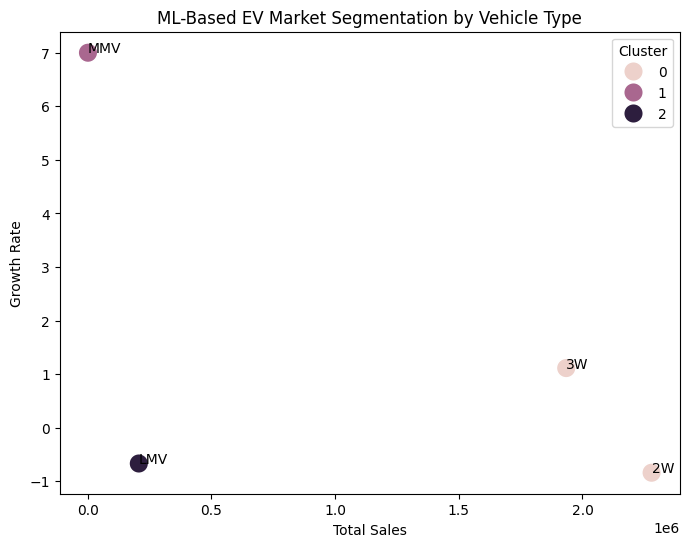

In [82]:
# ML segmentation visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=ml_data,
    x="Total_Sales",
    y="Growth_Rate",
    hue="Cluster",
    s=200
)

for i in range(len(ml_data)):
    plt.text(
        ml_data["Total_Sales"][i],
        ml_data["Growth_Rate"][i],
        ml_data["Vehicle_Type"][i]
    )

plt.title("ML-Based EV Market Segmentation by Vehicle Type")
plt.xlabel("Total Sales")
plt.ylabel("Growth Rate")
plt.show()



**Key Takeaways:**
- Cluster 0 = Mature & saturated market
- Cluster 1 = High-growth opportunity
- Cluster 2 = Emerging / experimental


###16. **EV SALES TREND BY VEHICLE TYPE & YEAR**

In [91]:
# Aggregate sales by vehicle type & year
heatmap_data = (
    df_long.groupby(["Vehicle_Type", "Year"])["EV_Sales"]
    .sum()
    .reset_index()
)


In [92]:
# pivot for heatmap
heatmap_pivot = heatmap_data.pivot(
    index="Vehicle_Type",
    columns="Year",
    values="EV_Sales"
)


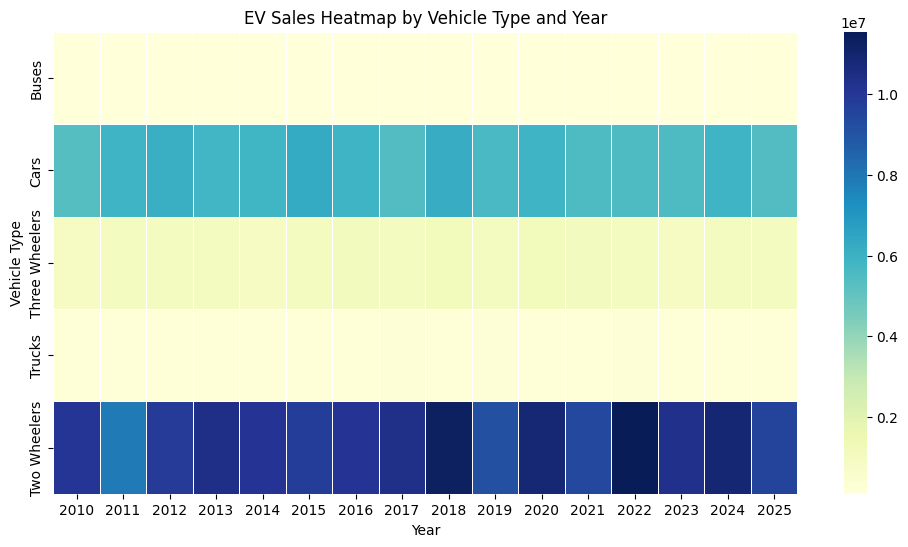

In [93]:
# plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_pivot,
    cmap="YlGnBu",
    linewidths=0.5
)

plt.title("EV Sales Heatmap by Vehicle Type and Year")
plt.xlabel("Year")
plt.ylabel("Vehicle Type")
plt.show()
